Automatically created module for IPython interactive environment
Optimal number of features for SVM : 4200
Optimal number of features for Logistic : 200


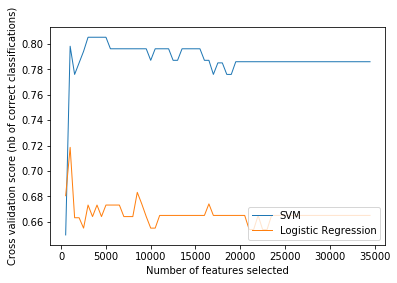

Printing SVMCV results:
1. Number of features: 6000;Grid_Score: 0.805354
2. Number of features: 5000;Grid_Score: 0.805354
3. Number of features: 7000;Grid_Score: 0.805354
4. Number of features: 9000;Grid_Score: 0.805354
5. Number of features: 1000;Grid_Score: 0.798283
6. Number of features: 11000;Grid_Score: 0.796263
7. Number of features: 10000;Grid_Score: 0.796263
8. Number of features: 30000;Grid_Score: 0.796263
9. Number of features: 29000;Grid_Score: 0.796263
10. Number of features: 28000;Grid_Score: 0.796263
11. Number of features: 27000;Grid_Score: 0.796263
12. Number of features: 26000;Grid_Score: 0.796263
13. Number of features: 12000;Grid_Score: 0.796263
14. Number of features: 23000;Grid_Score: 0.796263
15. Number of features: 22000;Grid_Score: 0.796263
16. Number of features: 21000;Grid_Score: 0.796263
17. Number of features: 20000;Grid_Score: 0.796263
18. Number of features: 18000;Grid_Score: 0.796263
19. Number of features: 17000;Grid_Score: 0.796263
20. Number of feature

In [50]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#ffrom sklearn import linear_model, svm
from sklearn.datasets import make_classification
import os 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model, svm


os.getcwd()
#os.chdir('/Users/yunwang/Documents/research/Jiook_AD/papers/idp_jiook_local/braindata')
dd =pd.read_csv("../braindata/data_2_conn.csv",header=0)
data=np.array(dd)
#print(data.shape)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]

X = stats.zscore(X)
y=data[:,6]
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

   # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

np.isnan(X).any()
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

svc=SVC(kernel="linear")
SVMcv = RFECV(estimator=svc, step=500,cv=StratifiedKFold(10),
          scoring='accuracy')
SVMcv.fit(X, y)
logistic = linear_model.LogisticRegression(C=1e5)
LOGcv = RFECV(estimator=logistic, step=500,cv=StratifiedKFold(10),
          scoring='accuracy')
LOGcv.fit(X, y)

print("Optimal number of features for SVM : %d" % SVMcv.n_features_)
print("Optimal number of features for Logistic : %d" % LOGcv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([x*500 for x in range(1, len(SVMcv.grid_scores_)+1)], SVMcv.grid_scores_,lw=1, label='SVM')
plt.plot([x*500 for x in range(1, len(LOGcv.grid_scores_)+1)], LOGcv.grid_scores_,lw=1, label='Logistic Regression')

plt.legend(loc="lower right")

#plt.ylim([0, 100])

plt.show()
g_scores = SVMcv.grid_scores_
indices = np.argsort(g_scores)[::-1]
print('Printing SVMCV results:')
for f in range(1, len(SVMcv.grid_scores_)):
    print("%d. Number of features: %d;Grid_Score: %f" % (f , indices[f]*1000, g_scores[indices[f]]))


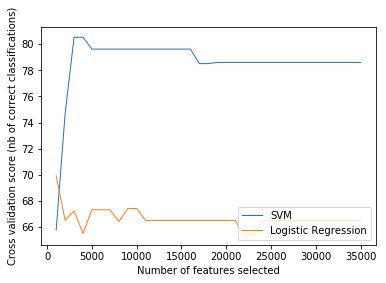

In [48]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([x*1000 for x in range(1, len(SVMcv.grid_scores_)+1)], SVMcv.grid_scores_*100,lw=1, label='SVM')
plt.plot([x*1000 for x in range(1, len(LOGcv.grid_scores_)+1)], LOGcv.grid_scores_*100,lw=1, label='Logistic Regression')

plt.legend(loc="lower right")

#plt.ylim([0, 1])

plt.show()

In [43]:
indices = np.argsort(g_scores)[::-1]
indices

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 33, 34,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 19, 17, 16,  1,
        0])

In [33]:
indices[f]

IndexError: index 1000 is out of bounds for axis 0 with size 35

In [22]:
g_scores.shape

(35,)

In [30]:
indices[f]

IndexError: index 1000 is out of bounds for axis 0 with size 35